In [4]:
!pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.9 MB/s eta 0:00:00


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns
import pytz
import datetime



In [7]:
from google.colab import files
uploaded = files.upload()

Saving Bitcoin Historical Data.csv to Bitcoin Historical Data.csv


In [9]:
import os
print(os.listdir("/content/"))

['.config', 'Bitcoin Historical Data.csv', 'sample_data']


In [13]:
def dateparse(time_in_secs):
    # Nếu time_in_secs là số giây (timestamp), bạn sẽ chuyển nó thành datetime
    try:
        return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))
    except ValueError:
        # Nếu không phải số giây, giả sử đây là chuỗi ngày tháng, ta sẽ chuyển đổi nó bằng pd.to_datetime
        return pd.to_datetime(time_in_secs, errors='coerce')  # 'coerce' sẽ chuyển đổi lỗi thành NaT

# Đọc dữ liệu từ CSV với hàm chuyển đổi ngày tháng đã định nghĩa
data = pd.read_csv('/content/Bitcoin Historical Data.csv', parse_dates=[0], date_parser=dateparse)

<ipython-input-13-34551933e1aa>:10: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3669 entries, 0 to 3668
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3669 non-null   datetime64[ns]
 1   Price     3669 non-null   object        
 2   Open      3669 non-null   object        
 3   High      3669 non-null   object        
 4   Low       3669 non-null   object        
 5   Vol.      3669 non-null   object        
 6   Change %  3669 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 200.8+ KB


In [15]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [16]:

# next we need to fix the OHLC (open high low close) data which is a continuous timeseries so
# lets fill forwards those values...
data['Open'].fillna(method='ffill', inplace=True)
data['High'].fillna(method='ffill', inplace=True)
data['Low'].fillna(method='ffill', inplace=True)
data['Vol.'].fillna(method='ffill', inplace=True)

data.head()

<ipython-input-16-b4433d787e83>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-16-b4433d787e83>:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-16-b4433d787e83>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [17]:
# Chuyển cột 'Date' thành tz-aware (UTC)
data['Date'] = pd.to_datetime(data['Date']).dt.tz_localize('UTC')

# Tạo valid date range với tz-aware datetime (UTC)
start = datetime.datetime(2015, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2018, 11, 11, 0, 0, 0, 0, pytz.UTC)

# Lọc dữ liệu giữa start và end, và nhóm theo tuần bắt đầu từ thứ Hai (W-MON)
weekly_rows = data[(data['Date'] >= start) & (data['Date'] <= end)].groupby([pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()

weekly_rows.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2015-01-05 00:00:00+00:00,274.8,264.7,278.3,262.9,54.99K,3.82%
1,2015-01-12 00:00:00+00:00,269.3,264.8,273.1,263.3,25.39K,1.72%
2,2015-01-19 00:00:00+00:00,215.9,210.6,219.5,205.5,31.58K,2.49%
3,2015-01-26 00:00:00+00:00,269.2,252.1,310.9,251.5,105.71K,6.78%
4,2015-02-02 00:00:00+00:00,238.9,225.3,242.5,220.5,39.02K,6.02%


In [28]:
def convert_volume(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3  # 1K = 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6  # 1M = 1,000,000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9  # 1B = 1,000,000,000
    return float(value)

weekly_rows['Vol.'] = weekly_rows['Vol.'].apply(convert_volume)
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Vol.'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)

layout = dict(
    title='Historical Bitcoin Volume (USD) (2015-2018) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [20]:
weekly_rows.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2015-01-05 00:00:00+00:00,274.8,264.7,278.3,262.9,54990.0,3.82%
1,2015-01-12 00:00:00+00:00,269.3,264.8,273.1,263.3,25390.0,1.72%
2,2015-01-19 00:00:00+00:00,215.9,210.6,219.5,205.5,31580.0,2.49%
3,2015-01-26 00:00:00+00:00,269.2,252.1,310.9,251.5,105710.0,6.78%
4,2015-02-02 00:00:00+00:00,238.9,225.3,242.5,220.5,39020.0,6.02%


In [29]:
import plotly.graph_objs as go
import plotly.offline as pyo
import pandas as pd


# Tạo scatter plot
trace = go.Scattergl(
    x=weekly_rows['Price'].astype(float),
    y=weekly_rows['Vol.'].astype(float),
    mode='markers',
    marker=dict(
        color='#FFBAD2',
        line=dict(width=1)
    )
)

# Định nghĩa layout (SỬA LỖI)
layout = go.Layout(
    title='BTC Volume vs USD',
    xaxis=dict(
        title=dict(   # Dùng title dưới dạng dict luôn
            text='Weighted Price',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=dict(
        title=dict(
            text='Volume BTC',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)

# Vẽ biểu đồ
data = [trace]
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig, filename='compare_webgl')


In [30]:
def convert_volume(value):
    if isinstance(value, str):
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3  # 1K = 1000
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6  # 1M = 1,000,000
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9  # 1B = 1,000,000,000
    return float(value)

weekly_rows['Vol.'] = weekly_rows['Vol.'].apply(convert_volume)
trace1 = go.Scatter(
    x = weekly_rows['Date'],
    y = weekly_rows['Vol.'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)

layout = dict(
    title='Historical Bitcoin Volume (USD) (2015-2018) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [31]:
data = pd.read_csv('Bitcoin Historical Data.csv',parse_dates=[0], date_parser=dateparse)
data.head()

<ipython-input-31-2e18953686ab>:1: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,"11,105.8","11,802.6","12,061.1","10,730.7",698.62K,-5.91%
1,2020-08-01,"11,803.1","11,333.2","11,847.7","11,226.1",611.47K,4.14%
2,2020-07-31,"11,333.4","11,096.5","11,434.8","10,964.6",530.95K,2.14%
3,2020-07-30,"11,096.2","11,105.8","11,164.4","10,861.6",501.14K,-0.09%
4,2020-07-29,"11,105.9","10,908.4","11,336.5","10,771.8",576.83K,1.81%


In [36]:
#load the dataset
data = pd.read_csv('Bitcoin Historical Data.csv',parse_dates=[0], date_parser=dateparse)
data['Date'] = data['Date'].dt.tz_localize(None)
data = data.groupby([pd.Grouper(key='Date', freq='H')]).first().reset_index()
data = data.set_index('Date')
data = data[['Price']]
data['Price'].fillna(method='ffill', inplace=True)
# # Loại bỏ dấu phẩy và chuyển đổi sang kiểu float
# data['Open'] = data['Open'].replace({',': ''}, regex=True).astype(float)
# # weekly_rows['Close'] = weekly_rows['Close'].replace({',': ''}, regex=True).astype(float)
data['Price'] = data['Price'].replace({',': ''}, regex=True).astype(float)

<ipython-input-36-acfa56fc05ab>:2: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.

<ipython-input-36-acfa56fc05ab>:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

<ipython-input-36-acfa56fc05ab>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-36-acfa56fc05ab>:7: FutureWarning:

Series.fillna with 'method' i

In [37]:
# split data
split_date = '25-Jun-2018'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

In [38]:


# Data preprocess
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

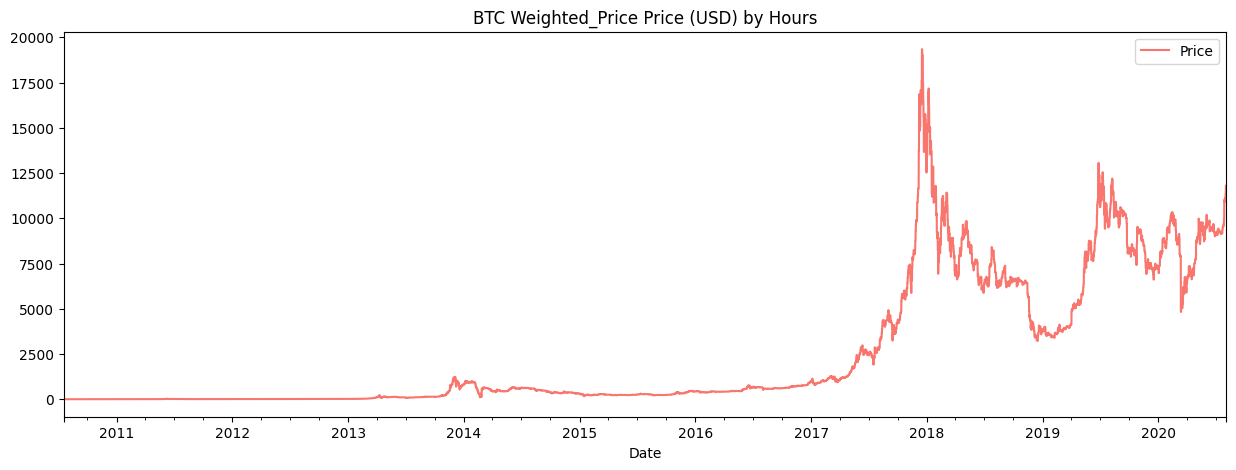

In [39]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = data.plot(style='', figsize=(15,5), color=color_pal[0], title='BTC Weighted_Price Price (USD) by Hours')

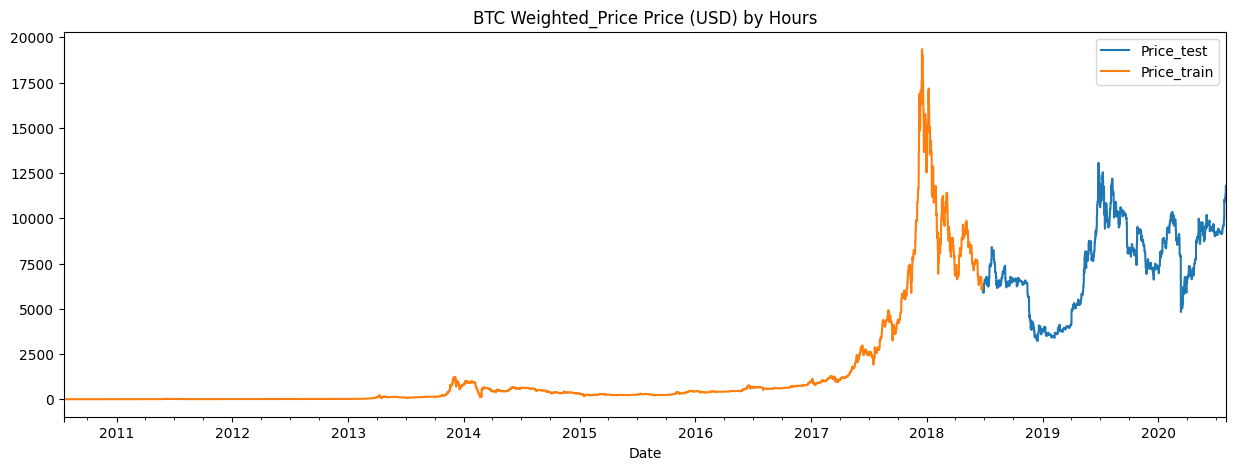

In [40]:
_ = data_test \
    .rename(columns={'Weighted_Price': 'Test Set'}) \
    .join(
        data_train.rename(columns={'Weighted_Price': 'Training Set'}),
        how='outer',
        lsuffix='_test',  # Thêm hậu tố cho cột trùng tên từ data_test
        rsuffix='_train'  # Thêm hậu tố cho cột trùng tên từ data_train
    ) \
    .plot(figsize=(15,5), title='BTC Weighted_Price Price (USD) by Hours', style='')



In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [43]:
# Load dataset
df = pd.read_csv("Bitcoin Historical Data.csv")  # Đọc file CSV
df['Date'] = pd.to_datetime(df['Date'])  # Chuyển thành dạng datetime
df = df.sort_values('Date')  # Sắp xếp theo thời gian tăng dần

# Chuyển đổi dữ liệu sang dạng số (loại bỏ ký tự % và dấu phẩy)
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
def convert_volume(value):
    if isinstance(value, str):  # Kiểm tra nếu giá trị là chuỗi
        if value == '-':  # Nếu giá trị là '-', thay bằng NaN
            return np.nan
        if 'K' in value:
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:
            return float(value.replace('M', '')) * 1e6
        elif 'B' in value:
            return float(value.replace('B', '')) * 1e9  # 1B = 1,000,000,000
    return float(value)  # Nếu không có ký tự đặc biệt, chuyển thành số

df['Vol.'] = df['Vol.'].apply(convert_volume)

df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

# Chọn cột cần dùng (Giá đóng cửa 'Price' để dự đoán)
data = df[['Date', 'Price']]

# Chuẩn hóa dữ liệu với MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Price']])


In [44]:
# Tạo tập huấn luyện với cửa sổ thời gian (sequence_length)
def create_sequences(data, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 30  # Sử dụng 30 ngày trước để dự đoán ngày tiếp theo
X, y = create_sequences(data_scaled, sequence_length)

# Chia dữ liệu thành train và test
split = int(0.8 * len(X))  # 80% train, 20% test
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Reshape lại X để phù hợp với input của LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [45]:
# Khởi tạo mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(sequence_length, 1)))  # LSTM 1 với return_sequences=True
model.add(Dropout(0.2))  # Dropout để tránh overfitting
model.add(LSTM(64, return_sequences=False))  # LSTM 2 không cần return_sequences
model.add(Dropout(0.2))
model.add(Dense(25))  # Lớp ẩn Dense
model.add(Dense(1))  # Lớp output (1 giá trị dự báo)

# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



91/91 - 9s - 101ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 2/50
91/91 - 10s - 107ms/step - loss: 9.2763e-04 - val_loss: 7.8849e-04
Epoch 3/50
91/91 - 6s - 71ms/step - loss: 6.4902e-04 - val_loss: 8.3443e-04
Epoch 4/50
91/91 - 5s - 55ms/step - loss: 5.7417e-04 - val_loss: 0.0033
Epoch 5/50
91/91 - 6s - 68ms/step - loss: 4.9244e-04 - val_loss: 0.0012
Epoch 6/50
91/91 - 9s - 100ms/step - loss: 4.7496e-04 - val_loss: 0.0014
Epoch 7/50
91/91 - 6s - 70ms/step - loss: 4.7884e-04 - val_loss: 0.0011
Epoch 8/50
91/91 - 10s - 112ms/step - loss: 4.9855e-04 - val_loss: 0.0015
Epoch 9/50
91/91 - 9s - 98ms/step - loss: 4.1621e-04 - val_loss: 0.0039
Epoch 10/50
91/91 - 6s - 71ms/step - loss: 4.7268e-04 - val_loss: 4.9165e-04
Epoch 11/50
91/91 - 10s - 115ms/step - loss: 5.0685e-04 - val_loss: 8.6553e-04
Epoch 12/50
91/91 - 8s - 92ms/step - loss: 3.7463e-04 - val_loss: 0.0021
Epoch 13/50
91/91 - 7s - 73ms/step - loss: 3.9514e-04 - val_loss: 4.9037e-04
Epoch 14/50
91/91 - 10s - 114ms/step - loss: 4.

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
MAE: 258.45, RMSE: 371.26


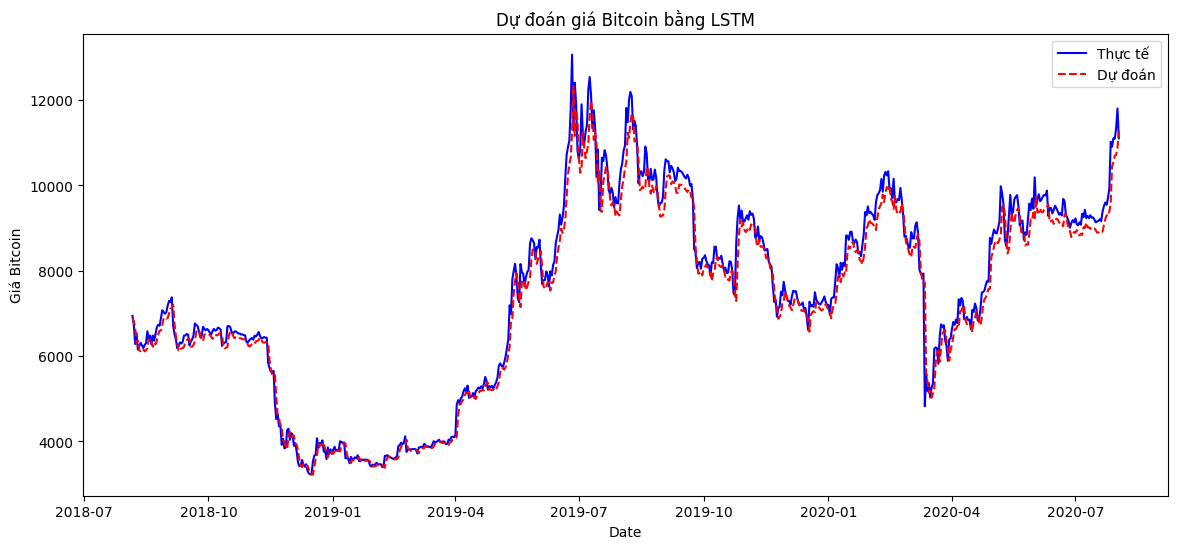

In [46]:
# Dự đoán trên tập test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Chuyển về giá trị thực tế

# Chuyển y_test về dạng thực tế để so sánh
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Tính toán lỗi
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Vẽ biểu đồ so sánh dự đoán và thực tế
plt.figure(figsize=(14,6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test_actual, label="Thực tế", color='blue')
plt.plot(df['Date'].iloc[-len(y_test):], predictions, label="Dự đoán", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Giá Bitcoin")
plt.title("Dự đoán giá Bitcoin bằng LSTM")
plt.legend()
plt.show()


In [47]:
# Lấy dữ liệu gần nhất để dự đoán ngày tiếp theo
last_30_days = data_scaled[-sequence_length:]  # Lấy 30 ngày gần nhất
last_30_days = last_30_days.reshape((1, sequence_length, 1))  # Reshape đúng input LSTM

# Dự đoán
next_day_price_scaled = model.predict(last_30_days)
next_day_price = scaler.inverse_transform(next_day_price_scaled)  # Chuyển về giá thực tế

print(f"Giá Bitcoin dự đoán ngày tiếp theo: {next_day_price[0][0]:.2f} USD")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Giá Bitcoin dự đoán ngày tiếp theo: 10826.73 USD
